In [52]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
from math import factorial
import strawberryfields as sf
from strawberryfields.backends.states import BaseBosonicState

from bosonicplus.states.coherent import gen_fock_coherent, gen_fock_superpos_coherent
from bosonicplus.states.wigner import Gauss
from bosonicplus.base import State

from bosonicplus.plotting import plot_wigner_marginals

import matplotlib.pyplot as plt

from bosonicplus.fidelity import fidelity_bosonic, fidelity_bosonic_new, fidelity_with_wigner

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
x = np.linspace(-10,10,200)
n = 20

In [25]:
#Make s1 with (n+1)**2 Gaussians
m, c, w = gen_fock_coherent(n, 1e-5)
s1 = State(1)
s1.update_data([m,c,w])
print('No of Gaussian in Wigner rep: ', len(w))
print('Norm', np.sum(w))
W1 = s1.get_wigner_bosonic(x,x)

No of Gaussian in Wigner rep:  441
Norm (1-6.938893903907228e-18j)


In [28]:
#Make s2 with around (n+1)**2 /2 Gaussians 

m, c, w, k = gen_fock_coherent(n,1e-5,fast =True)

print('No of Gaussians in fast Wigner rep', len(w))
print(f'No of normal Gaussians, {k}')
print('Norm naive', np.sum(w))
print('Norm of real parts', np.sum(w.real))
s2 = State(1)
s2.update_data([m,c,w,k])
W2 = s2.get_wigner_bosonic(x,x)

No of Gaussians in fast Wigner rep 231
No of normal Gaussians, 21
Norm naive (1+0.4180800433237765j)
Norm of real parts 1.0


max imag of W2: 0.11242745702836432
fidelity of s1 and s2 with Wigner: 0.9999941058311923


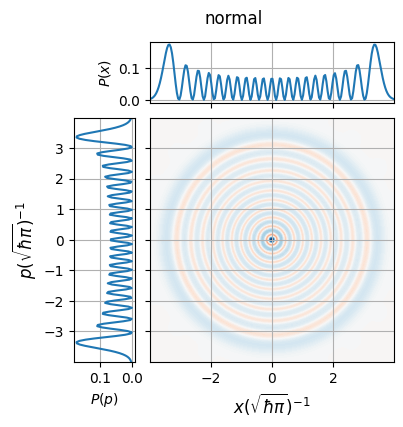

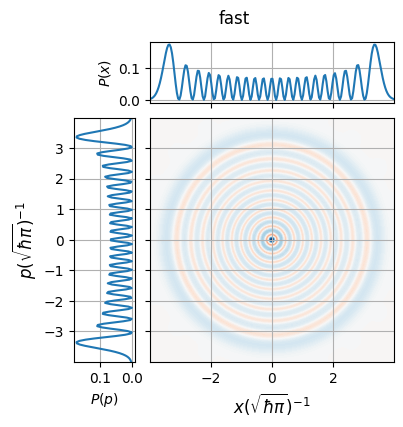

In [33]:
plot_wigner_marginals(W1,x,x,'normal')
plot_wigner_marginals(W2,x,x,'fast')

print('max imag of W2:', np.max(W2.imag))
print('fidelity of s1 and s2 with Wigner:', fidelity_with_wigner(W1,W2.real,x,x))
plt.show()

In [37]:
#Normal fidelity functions no longer work for fast Wigner

print('Purity s1', fidelity_bosonic(s1,s1))
print('Purity s1 with wigner', fidelity_with_wigner(W1,W1,x,x))


print('Purity of s2 with normal fid fun', fidelity_bosonic(s2,s2))

print('Fidelity of s2 to s1, normal fid fun', fidelity_bosonic(s2,s1))

print('Purity of s2 with normal wigner', fidelity_with_wigner(W2, W2,x,x))

print('Purity of s2 with real part of wigner', fidelity_with_wigner(W2.real, W2.real,x,x))

print('-'*100)

print('Purity s1, new fid fun', fidelity_bosonic_new(s1,s1))
print('Purity of s2, new fid fun', fidelity_bosonic_new(s2,s2))
print('Fidelity of s2 to s1, new fid fun', fidelity_bosonic_new(s2,s1))


Purity s1 (0.9999999999999996+1.1006557874859186e-17j)
Purity s1 with wigner 0.9999941058311923
Purity of s2 with normal fid fun (0.11961414247427382-1.588356182691264e-16j)
Fidelity of s2 to s1, normal fid fun (0.9999999999999997-7.632783294297951e-17j)
Purity of s2 with normal wigner (0.11969485202093154+2.515697397702904e-05j)
Purity of s2 with real part of wigner 0.9999941058311925
----------------------------------------------------------------------------------------------------
Purity s1, new fid fun (0.9999999999999996+1.1006557874859186e-17j)
Purity of s2, new fid fun (0.9999999999999998+0j)
Fidelity of s2 to s1, new fid fun (0.9999999999999996+6.587586989033504e-18j)


In [38]:
from time import time
t0 = time()
fidelity_bosonic(s1,s1)
t1 = time()
told = t1-t0


t0 = time()
fidelity_bosonic_new(s2,s2)
t1 = time()
tnew = t1-t0
print('time of old fidelity calc', told)
print('time of new fideility calc', tnew)
print('told/tnew', told/tnew)

time of old fidelity calc 0.026723146438598633
time of new fideility calc 0.010215997695922852
told/tnew 2.615813671264207


## Fock superpositions (GKP state)

In [39]:
from bosonicplus.states.gkp_squeezing import gkp_nonlinear_squeezing_operator
n = 10

rho = gkp_nonlinear_squeezing_operator(n)

w, v = np.linalg.eigh(rho)
    
coeffs = v[:,0] #eigs always sorted from lowest to highest eigenvalue, choose lowest

In [41]:
m,c,w=gen_fock_superpos_coherent(coeffs,1e-3)
gkp1 = State(1)
gkp1.update_data([m,c,w])
Wgkp1 = gkp1.get_wigner_bosonic(x,x)
print(len(w))

121


In [42]:
m,c,w,k=gen_fock_superpos_coherent(coeffs,1e-3,fast=True)
gkp2 = State(1)
gkp2.update_data([m,c,w,k])


Wgkp2 = gkp2.get_wigner_bosonic(x,x)

max imag of Wgkp2: 0.20679385837689462


/Users/s163967/Library/CloudStorage/OneDrive-DanmarksTekniskeUniversitet/Git_Repos/bosonicplus/src/bosonicplus/plotting.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Users/s163967/venv/240827-bp/lib/python3.11/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
/Users/s163967/venv/240827-bp/lib/python3.11/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part


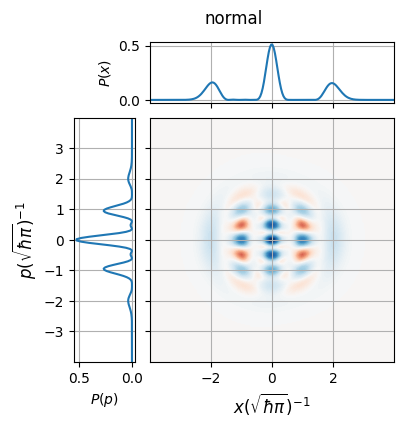

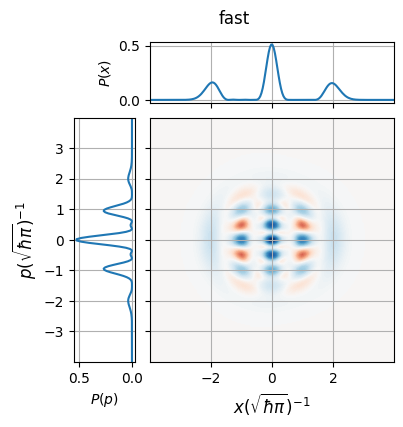

In [44]:
plot_wigner_marginals(Wgkp1,x,x,'normal')
plot_wigner_marginals(Wgkp2,x,x,'fast')

print('max imag of Wgkp2:', np.max(Wgkp2.imag))
plt.show()

In [45]:
#Fidelity function tests

print('Purity s1', fidelity_bosonic(gkp1,gkp1))
print('Purity s1 with wigner', fidelity_with_wigner(Wgkp1,Wgkp1,x,x))


print('Purity of s2 with normal fid fun', fidelity_bosonic(gkp2,gkp2))

print('Fidelity of s2 to s1, normal fid fun', fidelity_bosonic(gkp1,gkp2))

print('Purity of s2 with normal wigner', fidelity_with_wigner(Wgkp2, Wgkp2,x,x))
print('Purity of s2 with real wigner', fidelity_with_wigner(Wgkp2.real, Wgkp2.real,x,x))

print('-'*100)

print('Purity s1, new fid fun', fidelity_bosonic_new(gkp1,gkp1))
print('Purity of s2, new fid fun', fidelity_bosonic_new(gkp2,gkp2))
print('Fidelity of s2 to s1, new fid fun', fidelity_bosonic_new(gkp2,gkp1))


Purity s1 (1.000000000000006+4.440892098500622e-16j)
Purity s1 with wigner 0.9999999999999649
Purity of s2 with normal fid fun (-8.272271458003631+0.20448409500457004j)
Fidelity of s2 to s1, normal fid fun (1.0000000000000093+0.10224204750228515j)
Purity of s2 with normal wigner (-8.272271458003344+0.2044840950045482j)
Purity of s2 with real wigner 0.9999999999999633
----------------------------------------------------------------------------------------------------
Purity s1, new fid fun (1.0000000000000087+1.582067810090846e-15j)
Purity of s2, new fid fun (1.000000000000004+0j)
Fidelity of s2 to s1, new fid fun (1.0000000000000062+4.024558464266188e-16j)


# Measurements

In [46]:
from bosonicplus.operations.gbs import build_interferometer
from bosonicplus.operations.parameters import gen_interferometer_params

In [109]:
nmodes = 3
params = gen_interferometer_params(nmodes, 12)
ns = np.repeat(3,nmodes-1)
#ns = np.array([1,2,3])
x = np.linspace(-10,10,100)

In [110]:
k1 = 4 * 4
k2 = k1*(k1-1)/2
print(k2)
print(k1+k2)

120.0
136.0


In [103]:

state1 = build_interferometer(params, nmodes, True)
t0 = time()

for i,n in enumerate(ns):
    state1.post_select_fock_coherent(0,n,inf=1e-3,out=True)
    
W1 = state1.get_wigner_bosonic(x,x)

tf = time()
print(f'total time: {tf-t0}')

Sgate[-0.231,-0.552] on mode 0
Sgate[-0.715,0.714] on mode 1
Sgate[-0.385,0.704] on mode 2
Sgate[-0.241,-0.114] on mode 3
BSgate[0.291,-1.299] on modes 0 and 1
BSgate[1.129,0.034] on modes 2 and 3
BSgate[0.716,2.720] on modes 1 and 2
BSgate[1.068,1.759] on modes 0 and 1
BSgate[0.321,1.557] on modes 2 and 3
BSgate[0.694,1.092] on modes 1 and 2
Measuring 1 photons in mode 0.
Data shape before measurement, [(1, 8), (1, 8, 8), (1,)].
Probability of measurement = 9.893e-02+0.000e+00j
Data shape after measurement, [(4, 6), (1, 6, 6)]
Measuring 2 photons in mode 0.
Data shape before measurement, [(4, 6), (1, 6, 6), (4,)].
Probability of measurement = 1.004e-02+0.000e+00j
Data shape after measurement, [(36, 4), (1, 4, 4)]
Measuring 3 photons in mode 0.
Data shape before measurement, [(36, 4), (1, 4, 4), (36,)].
Probability of measurement = 1.012e-03-1.554e-15j
Data shape after measurement, [(576, 2), (1, 2, 2)]
total time: 0.12608623504638672


In [104]:
state2 = build_interferometer(params, nmodes, True)
t0 = time()
for i,n in enumerate(ns):
    state2.post_select_fock_coherent(0,n,inf = 1e-3,out=True, red_gauss = True)
    
W2 = state2.get_wigner_bosonic(x,x)
tf = time()
print(f'total time: {tf-t0}')


Sgate[-0.231,-0.552] on mode 0
Sgate[-0.715,0.714] on mode 1
Sgate[-0.385,0.704] on mode 2
Sgate[-0.241,-0.114] on mode 3
BSgate[0.291,-1.299] on modes 0 and 1
BSgate[1.129,0.034] on modes 2 and 3
BSgate[0.716,2.720] on modes 1 and 2
BSgate[1.068,1.759] on modes 0 and 1
BSgate[0.321,1.557] on modes 2 and 3
BSgate[0.694,1.092] on modes 1 and 2
Measuring 1 photons in mode 0.
Data shape before measurement, [(1, 8), (1, 8, 8), (1,)].
Probability of measurement = 9.893e-02
Data shape after measurement, [(3, 6), (1, 6, 6)]
Measuring 2 photons in mode 0.
Data shape before measurement, [(3, 6), (1, 6, 6), (3,)].
Probability of measurement = 1.004e-02
Data shape after measurement, [(21, 4), (1, 4, 4)]
Measuring 3 photons in mode 0.
Data shape before measurement, [(21, 4), (1, 4, 4), (21,)].
Probability of measurement = 1.012e-03
Data shape after measurement, [(300, 2), (1, 2, 2)]
total time: 0.07677125930786133


(<Figure size 400x400 with 3 Axes>,
 <Axes: xlabel='$x(\\sqrt{\\hbar\\pi})^{-1}$'>,
 <Axes: ylabel='$P(x)$'>,
 <Axes: xlabel='$P(p)$', ylabel='$p(\\sqrt{\\hbar\\pi})^{-1}$'>)

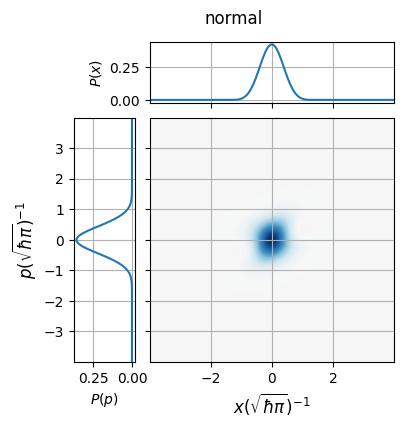

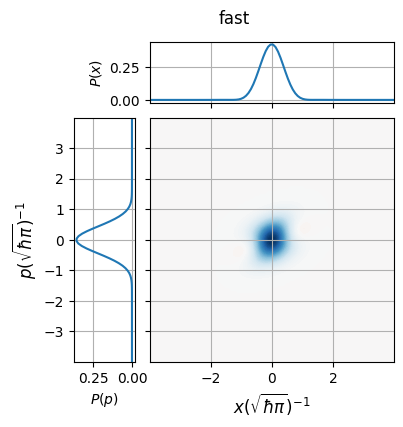

In [105]:
plot_wigner_marginals(W1,x,x,'normal')
plot_wigner_marginals(W2,x,x,'fast')


In [106]:
#Fidelity function tests, 

print('Purity s1', fidelity_bosonic(state1,state1))
print('Purity s1 with wigner', fidelity_with_wigner(W1,W1,x,x))


print('Purity of s2 with normal fid fun', fidelity_bosonic(state2,state2))

print('Fidelity of s2 to s1, normal fid fun', fidelity_bosonic(state1,state2))

print('Purity of s2 with wigner', fidelity_with_wigner(W2, W2,x,x))
print('Purity of s2 with real wigner', fidelity_with_wigner(W2.real, W2.real,x,x))

print('-'*100)

print('Purity s1, new fid fun', fidelity_bosonic_new(state1,state1))
print('Purity of s2, new fid fun', fidelity_bosonic_new(state2,state2))
print('Fidelity of s2 to s1, new fid fun', fidelity_bosonic_new(state2,state1))




Purity s1 (0.9999999885084455-4.7376467702037914e-08j)
Purity s1 with wigner (0.9999999999907941+2.8271837201584996e-12j)
Purity of s2 with normal fid fun (-170274.51110309505+159.71880529469408j)
Fidelity of s2 to s1, normal fid fun (0.9999998653362766+79.85940226643585j)
Purity of s2 with wigner (-170274.5111031833+159.71880521339497j)
Purity of s2 with real wigner 0.9999999999648482
----------------------------------------------------------------------------------------------------
Purity s1, new fid fun (0.9999999801429635-4.252259005409879e-08j)
Purity of s2, new fid fun (1.0000004902150958+0j)
Fidelity of s2 to s1, new fid fun (0.9999997219509549+1.0807515326759864e-08j)


In [101]:
#calculate fidelity to gkp state
print('fid gkp1, state1', fidelity_bosonic(state1,gkp1))
print('fid gkp2, state2', fidelity_bosonic_new(state2,gkp2))


fid gkp1, state1 (0.3968534891466474-2.3994509477974285e-10j)
fid gkp2, state2 (0.39685348943700793+0j)
